In [1]:
import pickle
import os
import re
import json
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from functools import reduce

In [2]:
# Enable automatic reloading of modules before executing code
%load_ext autoreload
%autoreload 2


import plotting as pl
from models import model as md
import utils as ut

In [3]:
def max_epoch(l_files):
    the_number = []
    for f in l_files:
        # extract number and store
        mtch = re.search(r"epoch(\d{4})\.txt$", f)
        try:
            the_number.append(mtch.groups()[0])
        except:
            the_number.append("0")
    the_number_int = [int(n) for n in the_number]
    max_value = max(the_number_int)
    indices = [index for index, value in enumerate(the_number_int) if value == max_value]
    file_to_extract = l_files[indices[0]]
    file_to_extract = file_to_extract.replace(".txt", ".tar")
    file_to_extract = file_to_extract.replace("sparse_embed", "model")
    return file_to_extract

In [14]:
def extract_results_id(lmbda, rnd_seed, modelversion, l_n, l_agreement, l_sparse, l_subjecttype, modeltype = "weightsonly_only_weights"):
    all_dirs = []
    l_all_results = []
    l_all_models = []
    l_agreements = []
    l_sparsity = []
    l_subject = []
    for n in l_n:
        for la in lmbda:
            for agr in l_agreement:
                for sp in l_sparse:
                    for st in l_subjecttype:
                        if modeltype == "weightsonly_only_weights":
                            results_dir_ID = os.path.join(
                                "./results", modelversion, "weightsonly_only_weights", 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                            print(results_dir_ID)
                            results_dir_ID1 = os.path.join(
                                "./results", modelversion, 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                        elif modeltype == "weightsonly_weights_and_intercepts":
                            results_dir_ID = os.path.join(
                                "./results", modelversion, "weightsonly_weights_and_intercepts", 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                        
                        elif modeltype == "random_weights_free_scaling":
                            results_dir_ID = os.path.join(
                                "./results", modelversion, "modeltype_random_weights_free_scaling", 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                            print(results_dir_ID)
                        if (modeltype == "weightsonly_only_weights") & (sp == "ID"):
                            all_dirs.append(results_dir_ID1)
                        else:
                            all_dirs.append(results_dir_ID)
                        l_agreements.append(agr)
                        l_sparsity.append(sp)
                        l_subject.append(st)
    for i, d in enumerate(all_dirs):
        file_path = os.path.join(d, 'results.json')
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                l_results = json.load(f)
                l_all_results.append(l_results)
        else:
            print(file_path + ": not found")
        l_files = os.listdir(results_dir_ID)
        latest_epoch = max_epoch(l_files)
        p = os.path.join(d, "model", latest_epoch)
        if os.path.isfile(p):
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["agreement"] = l_agreements[i]
            m["sparsity"] = l_sparsity[i]
            m["subject_type"] = l_subject[i]
            l_all_models.append(m)
        else:
            print(f'{p} does not exist')
    return l_all_models

In [15]:
def extract_results_avg(lmbda, rnd_seed, modelversion, l_n):
    all_dirs = []
    l_all_results = []
    l_all_models = []
    l_lambdas = []
    l_n_embed = []
    
    for n in l_n:
        for la in lmbda:
            results_dir_ID = os.path.join(
                "./results", modelversion, f'{n}d', str(la), f'seed{rnd_seed}'
            )
            all_dirs.append(results_dir_ID)
            l_lambdas.append(la)
            l_n_embed.append(n)
    for i, d in enumerate(all_dirs):
        file_path = os.path.join(d, 'results.json')
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                l_results = json.load(f)
                l_all_results.append(l_results)
        else:
            print(file_path + ": not found")
        l_files = os.listdir(results_dir_ID)
        latest_epoch = max_epoch(l_files)
        p = os.path.join(d, "model", latest_epoch)
        if os.path.isfile(p):
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["n_embed"] = l_n_embed[i]
            m["lambda"] = l_lambdas[i]
            l_all_models.append(m)
        else:
            p = os.path.join(d, "model", latest_epoch)
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["n_embed"] = l_n_embed[i]
            m["lambda"] = l_lambdas[i]
            l_all_models.append(m)
    return l_all_models

In [18]:
# id model
lmbda = [0.0005]
rnd_seed = '852'
modelversion = "avg-ID-jointly"
l_n = [15]
l_agreement = [""]#["most", "few"] #"few", 
l_sparse = ["both"]#["ID", "both"] #"both", 
l_subjecttype = ["subjects_actual"]#, "subjects_shuffled"]
l_all_models_id = extract_results_id(
    lmbda, rnd_seed, modelversion, l_n, l_agreement, l_sparse, l_subjecttype, modeltype="random_weights_free_scaling"
)

./results\avg-ID-jointly\modeltype_random_weights_free_scaling\15d\0.0005\both\subjects_actual\seed852
./results\avg-ID-jointly\modeltype_random_weights_free_scaling\15d\0.0005\both\subjects_actual\seed852\results.json: not found


In [19]:
l_all_models_id

[{'epoch': 75,
  'model_state_dict': OrderedDict([('model1.global_mean',
                tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
               ('model1.global_std',
                tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])),
               ('model1.fc.weight',
                tensor([[0.1558, 0.1040, 0.0657,  ..., 0.0638, 0.0179, 0.9719],
                        [1.3630, 0.0514, 0.0169,  ..., 1.1937, 0.1894, 0.5681],
                        [1.0653, 0.1610, 0.3060,  ..., 1.1413, 0.0315, 0.2739],
                        ...,
                        [0.1211, 0.0093, 0.0056,  ..., 0.1598, 0.6847, 0.4098],
                        [0.4244, 0.7628, 0.3780,  ..., 0.1767, 0.1993, 0.0955],
                        [0.0083, 0.3881, 0.5976,  ..., 0.1701, 0.5147, 0.1911]])),
               ('model1.individual_slopes.weight',
                tensor([[0.9704, 0.8884, 0.8113,  ..., 0.9520, 1.1965, 0.9241],
                        [2.3170, 1.20

In [17]:
# avg model
lmbda = [0.0005]
rnd_seed = '852'
modelversion = "avg"
l_n = [15, 50]
l_subjecttype = ["subjects_actual", "subjects_shuffled"]
l_all_models_avg = extract_results_avg(lmbda, rnd_seed, modelversion, l_n)

./results\avg\15d\0.0005\seed852\results.json: not found


FileNotFoundError: [WinError 3] The system cannot find the path specified: './results\\avg\\50d\\0.0005\\seed852'

In [115]:
l_all_models_id[0]

{'epoch': 100,
 'model_state_dict': OrderedDict([('fc.weight',
               tensor([[0.0675, 1.0140, 0.4375,  ..., 0.4561, 0.4769, 0.8933],
                       [0.0484, 0.8217, 0.9042,  ..., 0.1463, 0.9060, 0.0695],
                       [0.0824, 0.0534, 0.2342,  ..., 0.0580, 1.2447, 0.1009],
                       ...,
                       [1.1360, 0.6108, 0.2601,  ..., 0.7314, 0.3667, 0.6472],
                       [0.0833, 1.1105, 0.7224,  ..., 0.4798, 0.5089, 0.7971],
                       [0.2443, 1.0001, 0.8400,  ..., 0.1054, 0.7220, 0.4040]])),
              ('individual_slopes.weight',
               tensor([[0.9631, 0.0266, 1.0342,  ..., 0.8418, 0.8696, 0.5865],
                       [0.8059, 0.5777, 0.8543,  ..., 0.9572, 0.9598, 1.0835],
                       [1.2174, 0.3551, 1.1029,  ..., 1.2804, 1.2091, 0.9440],
                       ...,
                       [1.2976, 1.4837, 1.1355,  ..., 1.4418, 1.1892, 1.1512],
                       [1.1640, 1.4604, 1.483

In [20]:
l_df_train_eval_id = [
    pd.DataFrame({
        "ndim": l["n_embed"],
        "lambda": l["lambda"],
        "agreement": l["agreement"],
        "sparsity": l["sparsity"],
        "subject_type": l["subject_type"],
        "train_acc": l["train_accs"],
        "val_acc": l["val_accs"],
    })
    for l in l_all_models_id
]

In [21]:
l_df_train_eval_avg = [
    pd.DataFrame({
        "ndim": l["n_embed"],
        "lambda": l["lambda"],
        "train_acc": l["train_accs"],
        "val_acc": l["val_accs"],
    })
    for l in l_all_models_avg
]

NameError: name 'l_all_models_avg' is not defined

In [22]:
df_train_eval_id = reduce(lambda x, y: pd.concat([x, y], axis=0, ignore_index=True), l_df_train_eval_id)

In [23]:
df_train_eval_id.head()

,ndim,lambda,agreement,sparsity,subject_type,train_acc,val_acc
0,15,0.0005,,both,subjects_actual,0.455641,0.462576
1,15,0.0005,,both,subjects_actual,0.473624,0.488052
2,15,0.0005,,both,subjects_actual,0.506427,0.528111
3,15,0.0005,,both,subjects_actual,0.583647,0.618640
4,15,0.0005,,both,subjects_actual,0.636155,0.638358


In [120]:
df_train_eval_avg = reduce(lambda x, y: pd.concat([x, y], axis=0, ignore_index=True), l_df_train_eval_avg)

In [121]:
df_train_eval_id["epoch"] = df_train_eval_id.groupby(["ndim", "lambda", "agreement", "sparsity"]).cumcount()
df_train_eval_avg["epoch"] = df_train_eval_avg.groupby(["ndim", "lambda"]).cumcount()
df_train_eval_avg["subject_type"] = "subjects_actual"

In [24]:
df_train_eval_id["epoch"] = df_train_eval_id.groupby(["ndim", "lambda", "agreement", "sparsity"]).cumcount()

In [29]:
df_train_eval_id["val_acc"].sort_values(ascending=False)

71    0.659286
61    0.659183
73    0.659177
68    0.659104
74    0.659042
        ...   
4     0.638358
3     0.618640
2     0.528111
1     0.488052
0     0.462576
Name: val_acc, Length: 75, dtype: float64

In [123]:
df_train_eval_id.groupby(["ndim", "lambda", "agreement", "sparsity"]).count()

,,,,subject_type,train_acc,val_acc,epoch
ndim,lambda,agreement,sparsity,,,,
15,0.0005,,both,200,200,200,200


In [124]:
df_train_eval_long_id = pd.melt(
    df_train_eval_id, 
    id_vars=["ndim", "lambda", "agreement", "sparsity", "subject_type", "epoch"], 
    value_vars = ["train_acc", "val_acc"], 
    var_name = "Variable",
    value_name = "Accuracy"
)

In [125]:
df_train_eval_long_avg = pd.melt(
    df_train_eval_avg, 
    id_vars=["ndim", "lambda", "epoch"], 
    value_vars = ["train_acc", "val_acc"], 
    var_name = "Variable",
    value_name = "Accuracy"
)

In [126]:
df_train_eval_long_id['lambda_ndim'] = df_train_eval_long_id['lambda'].astype(str) + '_' + df_train_eval_long_id['ndim'].astype(str)
df_train_eval_long_id['agreement_sparsity'] = df_train_eval_long_id['agreement'].astype(str) + '_' + df_train_eval_long_id['sparsity'].astype(str)

In [127]:
df_train_eval_long_id.query("epoch == 1499 & Variable == 'val_acc'").sort_values("Accuracy")

,ndim,lambda,agreement,sparsity,subject_type,epoch,Variable,Accuracy,lambda_ndim,agreement_sparsity


In [147]:
df_train_eval_long_id.head()

,ndim,lambda,agreement,sparsity,subject_type,epoch,Variable,Accuracy,lambda_ndim,agreement_sparsity
0,15,0.0005,,both,subjects_actual,0,train_acc,0.439823,0.0005_15,_both
1,15,0.0005,,both,subjects_actual,1,train_acc,0.448902,0.0005_15,_both
2,15,0.0005,,both,subjects_actual,2,train_acc,0.460326,0.0005_15,_both
3,15,0.0005,,both,subjects_actual,3,train_acc,0.483185,0.0005_15,_both
4,15,0.0005,,both,subjects_actual,4,train_acc,0.523278,0.0005_15,_both


In [148]:
df_id_best = df_train_eval_long_id.query("`lambda` == 0.0005 & ndim == 15 & subject_type == 'subjects_actual'").copy()
df_id_best["id_level"] = "ID"

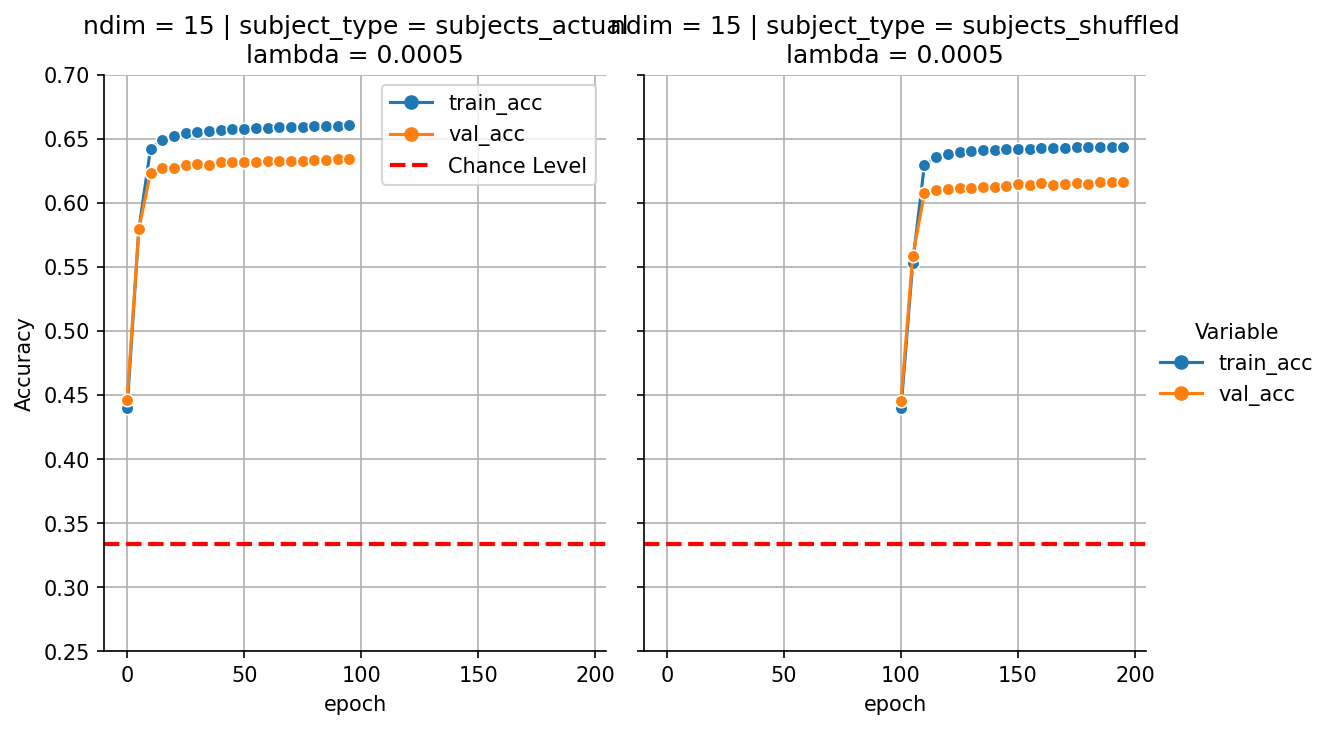

In [149]:
# Create the FacetGrid without specifying an external axis
g = sns.relplot(
    data=df_train_eval_long_id.query("epoch % 5 == 0"), 
    x='epoch', y='Accuracy', 
    col='subject_type', row="ndim", height=4, hue="Variable",
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(.25, .7)
    if i == 0:
        ax.legend()

# Embed constant in the title of each facet
constant = "lambda = 0.0005"
for ax in g.axes.flat:
    # Get the existing title
    title = ax.get_title()
    # Add the constant to the title
    ax.set_title(f"{title}\n{constant}")

# Adjust the plot size
g.fig.set_size_inches(9, 5)
g.fig.set_dpi(150)

plt.show()

Evaluate winning model against best avg model

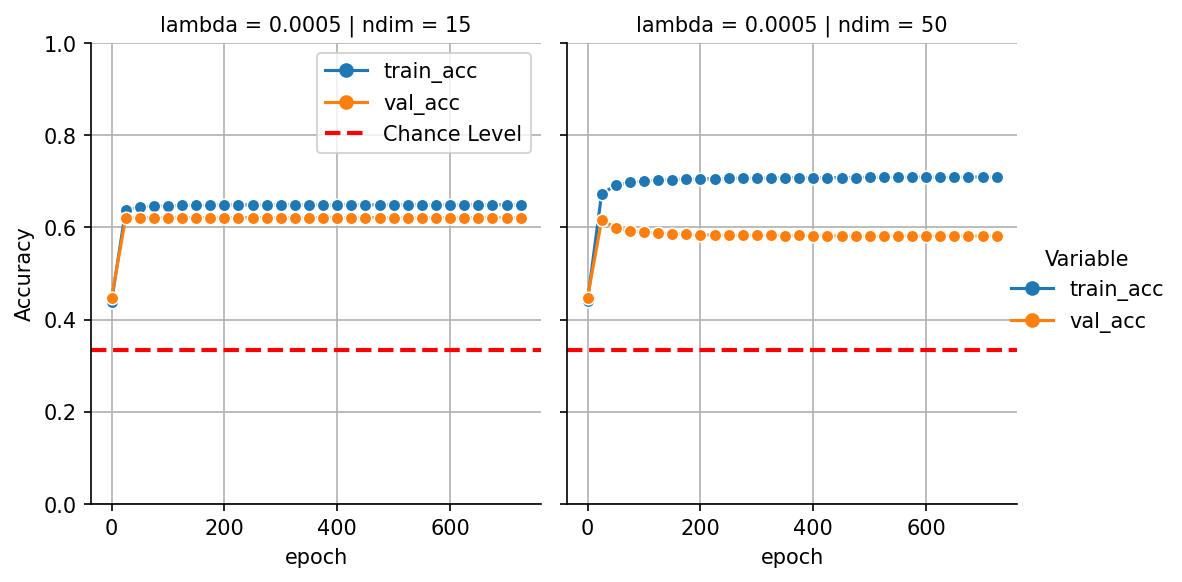

In [150]:
# Create the FacetGrid without specifying an external axis
g = sns.relplot(
    data=df_train_eval_long_avg.query("epoch <= 749 & epoch % 25 == 0"), x='epoch', y='Accuracy', 
    col='ndim', row="lambda", height=4, hue="Variable",
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(0, 1)
    if i == 0:
        ax.legend()

# Adjust the plot size
g.fig.set_size_inches(8, 4)
g.fig.set_dpi(150)

plt.show()

In [151]:
df_avg_best = df_train_eval_long_avg.query("`lambda` == 0.0005 & ndim == 15").copy()
df_avg_best["id_level"] = "avg"

In [152]:
cols_shared = np.intersect1d(df_id_best.columns, df_avg_best.columns)
df_best_both = pd.concat([df_id_best[cols_shared], df_avg_best[cols_shared]])

In [153]:
df_best_both.head()

,Accuracy,Variable,epoch,id_level,lambda,ndim
0,0.439823,train_acc,0,ID,0.0005,15
1,0.448902,train_acc,1,ID,0.0005,15
2,0.460326,train_acc,2,ID,0.0005,15
3,0.483185,train_acc,3,ID,0.0005,15
4,0.523278,train_acc,4,ID,0.0005,15


C:\Users\MirkoThalmann\AppData\Local\Temp\ipykernel_22212\809678573.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  g = sns.relplot(


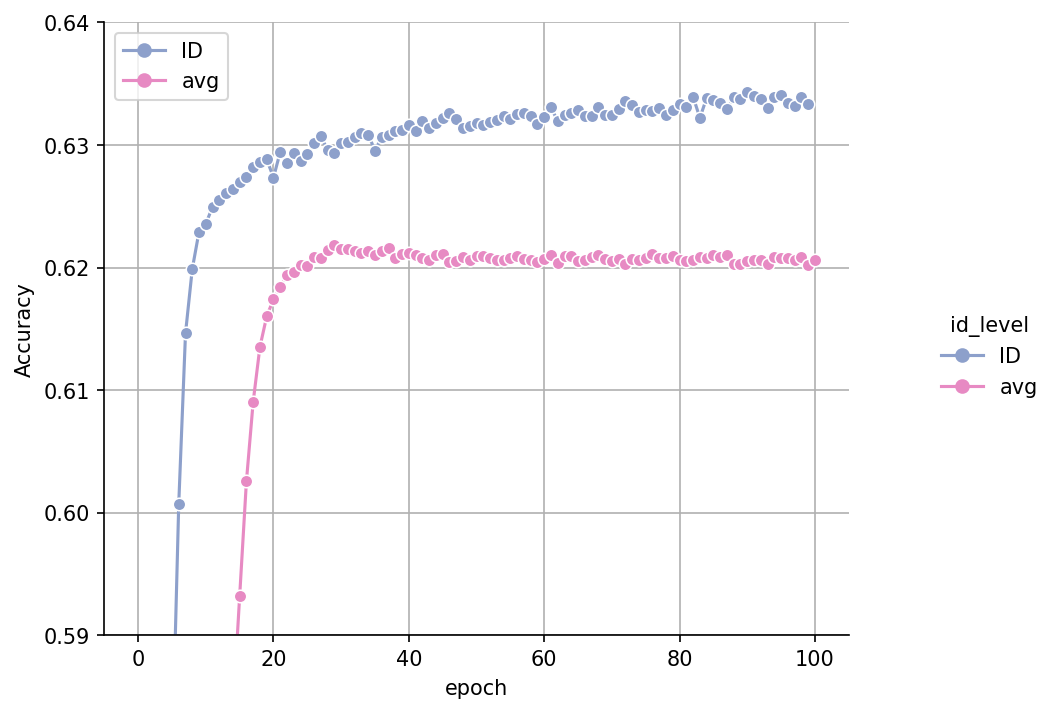

In [155]:
# Create the FacetGrid without specifying an external axis
palette = sns.color_palette("Set2")[2:]
g = sns.relplot(
    data=df_best_both.query("Variable == 'val_acc' & epoch <= 100"), x='epoch', y='Accuracy', 
    height=4, hue="id_level", palette=palette,
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    #ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(.59, .64)
    if i == 0:
        ax.legend()

# Adjust the plot size
g.fig.set_size_inches(8, 5)
g.fig.set_dpi(150)

plt.show()

*TODOs
- run all models for at least 100 epochs, but then apply early stopping
- run avg model with 15 dims
- run avg model cutting the dimensionality itself
- run id models with shuffled ids, and with actual ids

In [46]:
l_all_models_id[3]["model_state_dict"]["fc.weight"].shape

torch.Size([15, 1854])

In [47]:
l_all_models_id[3]["model_state_dict"]["individual_slopes.weight"].shape

torch.Size([264, 15])

# Comparison per Participant

In [156]:
triplets_dir = './data/'
device = "cpu"
# load triplets into memory
train_triplets, test_triplets = ut.load_data_ID(
    device=device, triplets_dir=triplets_dir, testcase=False)


...Could not find any .npy files for current modality.
...Now searching for .txt files.



In [161]:
l_all_models_id[0]["subject_type"]

'subjects_actual'

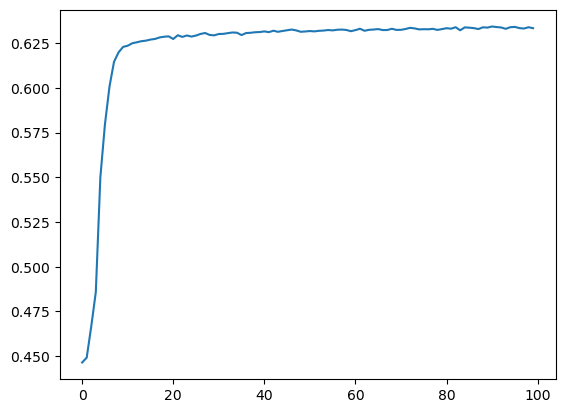

In [162]:
plt.plot(l_all_models_id[0]["val_accs"])

In [163]:
array_weights_items = np.array(l_all_models_id[0]["model_state_dict"]["fc.weight"]).transpose()

In [164]:
array_weights_id = l_all_models_id[0]["model_state_dict"]["individual_slopes.weight"]

In [165]:
anchors = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 0])]))
positives = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 1])]))
negatives = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 2])]))

In [166]:
anchors = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 0])])
positives = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 1])])
negatives = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 2])])

In [167]:
ids = test_triplets[:, 3].numpy()

In [168]:
anchors_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(anchors)]
positives_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(positives)]
negatives_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(negatives)]

In [169]:
from functools import partial

In [170]:
f_partial = partial(ut.delta_avg_id, anchors, positives, negatives, anchors_weighted, positives_weighted, negatives_weighted, ids)

In [171]:
ids_unique_sorted = np.sort(np.unique(ids))

In [172]:
l_deltas = list(map(f_partial, ids_unique_sorted))

In [173]:
df_ns = pd.DataFrame(ids, columns=['id'])
df_ns = df_ns.groupby("id")["id"].count() * 4
df_ns = df_ns.reset_index(name = "n_train")
df_ns["delta"] = l_deltas

In [174]:
df_ns.to_csv("data/deltas-learned-weighted-embeddings.csv")